In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random


In [0]:
np.random.seed(0)


In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


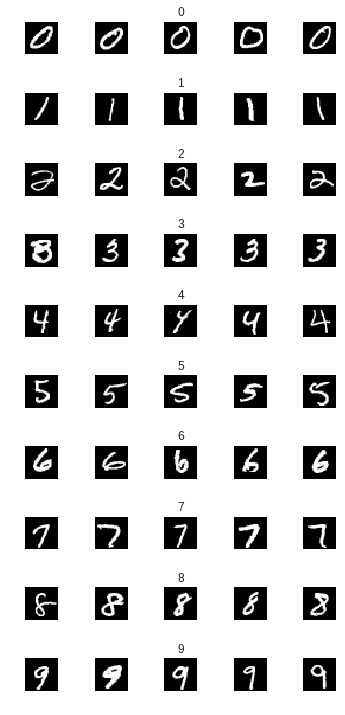

In [0]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


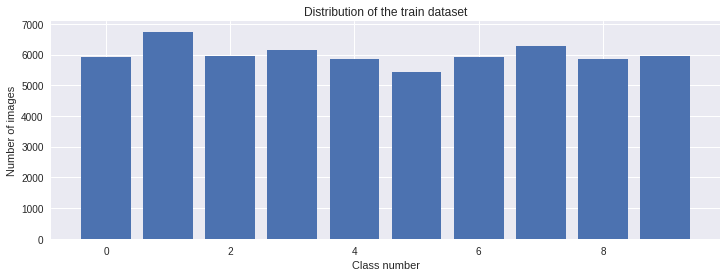

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [0]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

In [0]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.2486 - acc: 0.9195 - val_loss: 0.0517 - val_acc: 0.9853
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0696 - acc: 0.9783 - val_loss: 0.0394 - val_acc: 0.9888
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0612 - acc: 0.9817 - val_loss: 0.0397 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0532 - acc: 0.9836 - val_loss: 0.0343 - val_acc: 0.9897
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0447 - acc: 0.9861 - val_loss: 0.0339 - val_acc: 0.9903
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0402 - acc: 0.9879 - val_loss: 0.0406 - val_acc: 0.9900
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0361 - val_acc:

Text(0.5, 0, 'epoch')

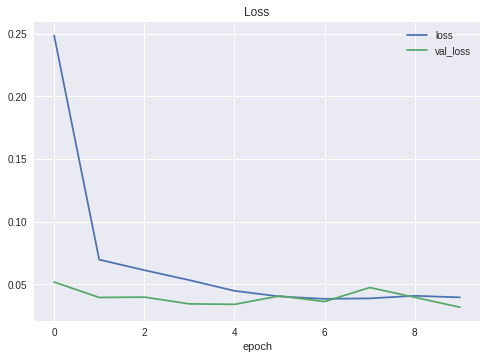

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

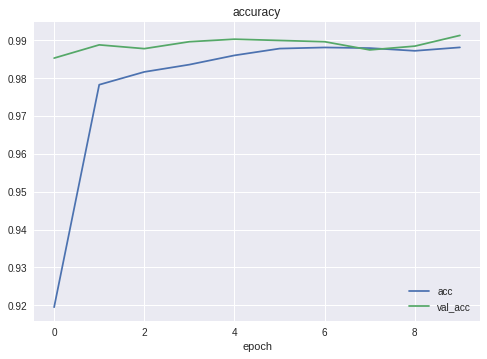

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

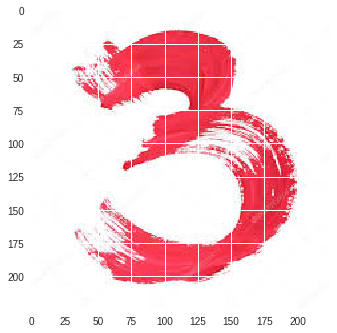

In [0]:
import requests
from PIL import Image
url ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

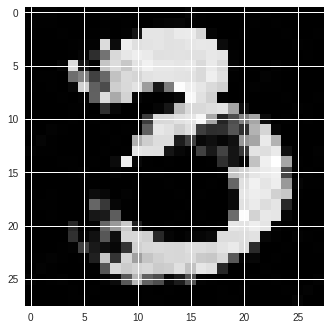

In [0]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [0]:
img = img/255
img = img.reshape(1, 28, 28, 1)
print("predicted digit: "+str(model.predict_classes(img)))

predicted digit: [3]


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.03596066819927628
Test Accuracy: 0.9892


In [0]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)



(1, 24, 24, 30)
(1, 10, 10, 15)


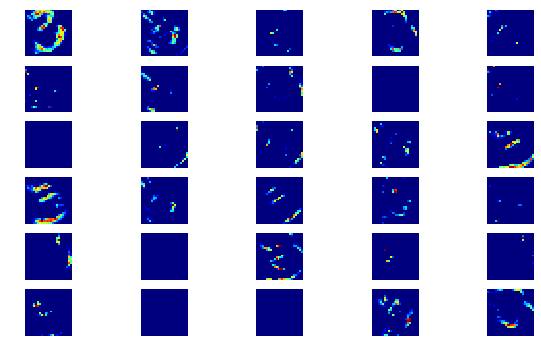

In [0]:
plt.figure(figsize = (10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')



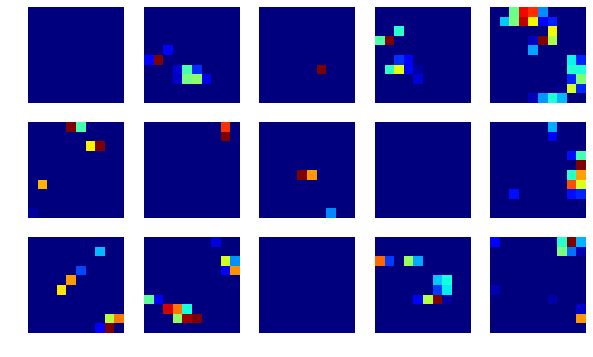

In [0]:
plt.figure(figsize = (10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')